In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:

file_path = '/content/india_states.geojson'

# Load the GeoJSON file using geopandas
indian_states = gpd.read_file(file_path)

# Display the loaded data (optional)
indian_states.head()  # To show the first few rows of the dataset


,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,filename,filename_1,filename_2,filename_3,filename_4,geometry
0,105,IND,India,1,Andaman and Nicobar,,Andaman & Nicobar Islands|Andaman et Nicobar|I...,Union Territor,Union Territory,,,,,,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,,,State,State,,,,,,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,105,IND,India,3,Arunachal Pradesh,,Agence de la Frontire du Nord-Est(French-obsol...,State,State,,,,,,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,,,State,State,,,,,,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,,,State,State,,,,,,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [3]:
crime_data=pd.read_csv('/content/EDA_DPL_DATASET.csv')
crime_data.head()

,Area_Name,Year,Group_Name,Acquitted,cases_Comp_or_Withdrawn,Arrested,Chargesheeted,Convicted,In_Custody/Bail_Beginning,In_Custody/Bail_End,In_Custody/Bail_End.1,Released_Before_Trial,Trial_Completed,Under_Trial_Beginning,Total_Under_Trial
0,Andaman & Nicobar Islands,2001,Kidnapping & Abduction - Women & Girls,2,0,4,5,0,9,8,25,0,2,22,27
1,Tripura,2001,Molestation,39,0,62,49,6,38,24,66,27,45,62,111
2,Uttar Pradesh,2001,Molestation,1172,175,3960,3834,1776,223,258,9900,91,2948,9189,13023
3,Uttarakhand,2001,Molestation,37,24,150,140,71,7,8,322,9,108,314,454
4,West Bengal,2001,Molestation,456,0,1163,929,85,824,824,4877,234,541,4489,5418


In [7]:
crime_data_by_state = crime_data.groupby('Area_Name').sum().reset_index()
aggregated_data = crime_data_by_state[['Area_Name', 'Total_Under_Trial']]  # Considering 'Total_Under_Trial' as a representative crime count
aggregated_data = aggregated_data.rename(columns={'Area_Name': 'State', 'Total_Under_Trial': 'CrimeRate'})


<ipython-input-7-0f4e4e1822d9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_data_by_state = crime_data.groupby('Area_Name').sum().reset_index()


In [8]:
# Merging aggregated crime data with geographical data based on state names
merged_data = indian_states.merge(aggregated_data, how='left', left_on='NAME_1', right_on='State')


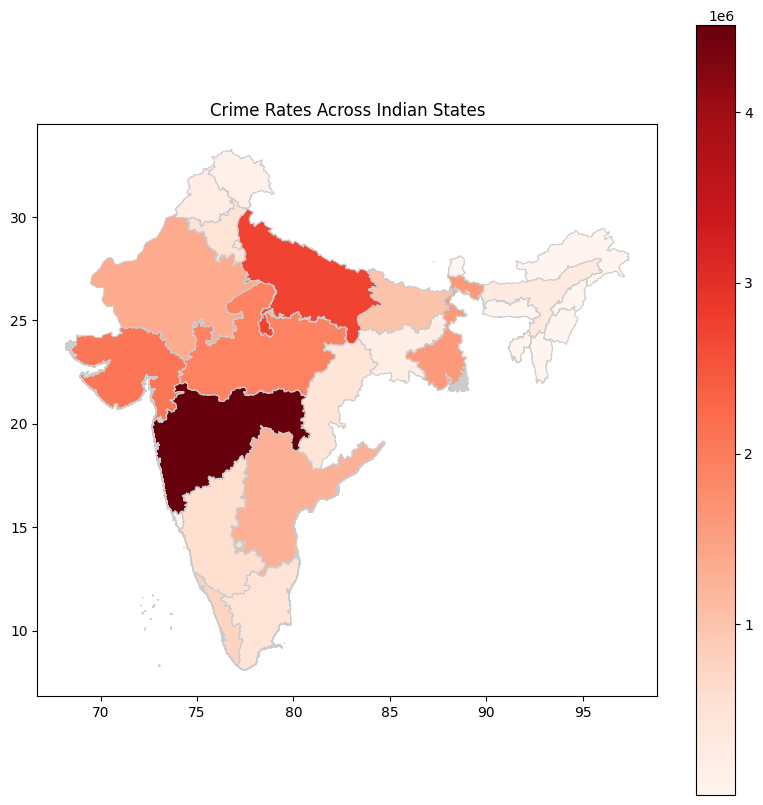

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a choropleth map to visualize the crime rates across Indian states
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Crime Rates Across Indian States')
merged_data.plot(column='CrimeRate', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.show()


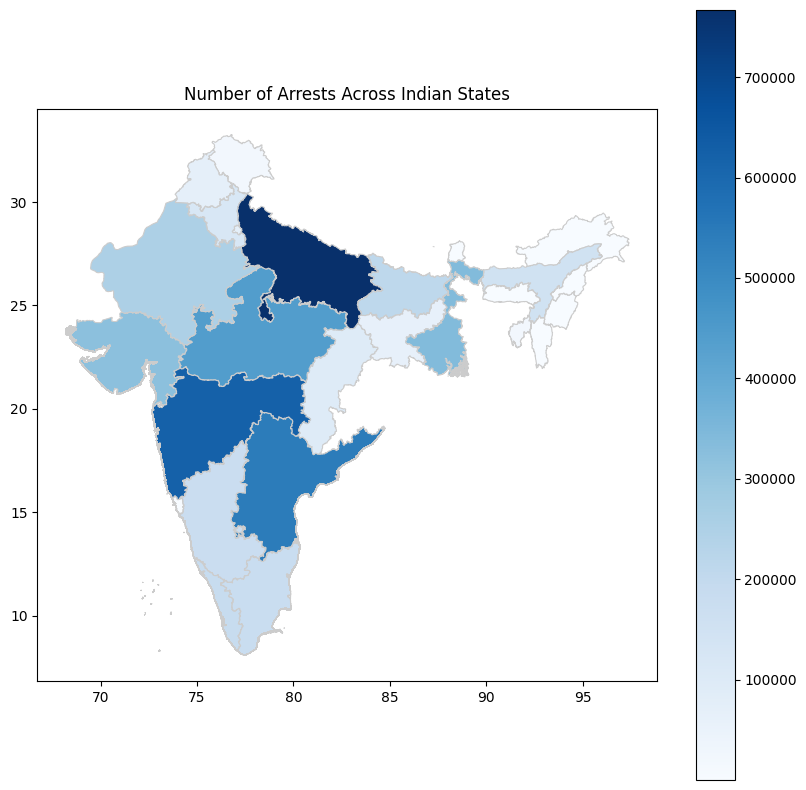

In [11]:
# Aggregate the arrests data by state
arrests_by_state = crime_data.groupby('Area_Name')['Arrested'].sum().reset_index()

# Rename columns for consistency with GeoJSON data
arrests_by_state = arrests_by_state.rename(columns={'Area_Name': 'State', 'Arrested': 'Arrests'})

# Merge the arrests data with geographical data based on state names
merged_arrests_data = indian_states.merge(arrests_by_state, how='left', left_on='NAME_1', right_on='State')

# Create the choropleth map to visualize the number of arrests across Indian states
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Number of Arrests Across Indian States')
merged_arrests_data.plot(column='Arrests', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.show()


In [15]:
print(crime_data.columns)


Index(['Area_Name', 'Year', 'Group_Name', 'Acquitted',
       'cases_Comp_or_Withdrawn', 'Arrested', 'Chargesheeted', 'Convicted',
       'In_Custody/Bail_Beginning', 'In_Custody/Bail_End',
       'In_Custody/Bail_End.1', ' Released_Before_Trial', 'Trial_Completed',
       'Under_Trial_Beginning', 'Total_Under_Trial'],
      dtype='object')


<ipython-input-16-a2d64c26385e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = crime_type_data.groupby('Area_Name').sum().reset_index()


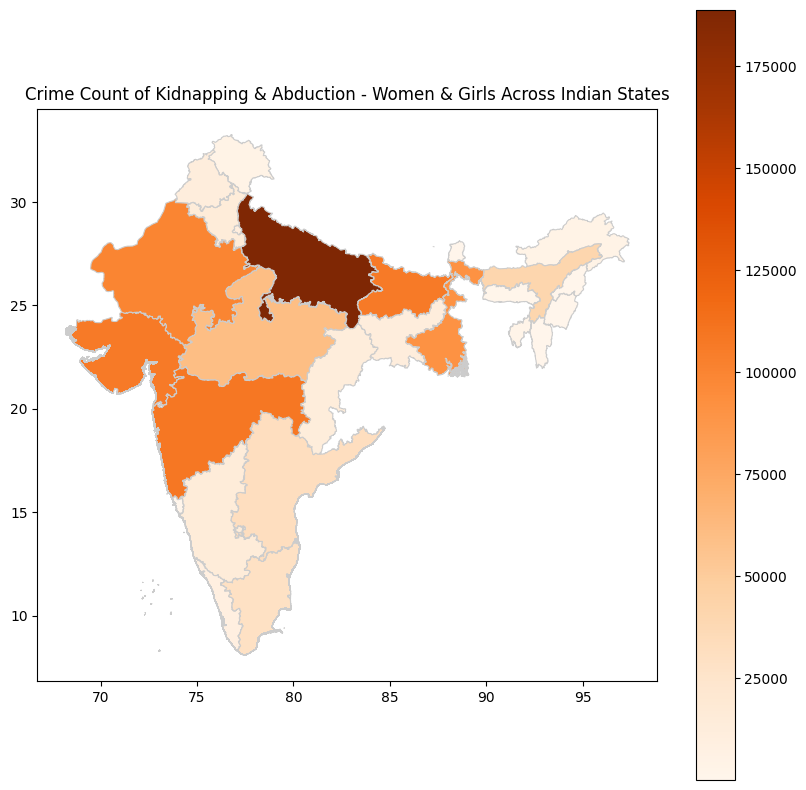

<ipython-input-16-a2d64c26385e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = crime_type_data.groupby('Area_Name').sum().reset_index()


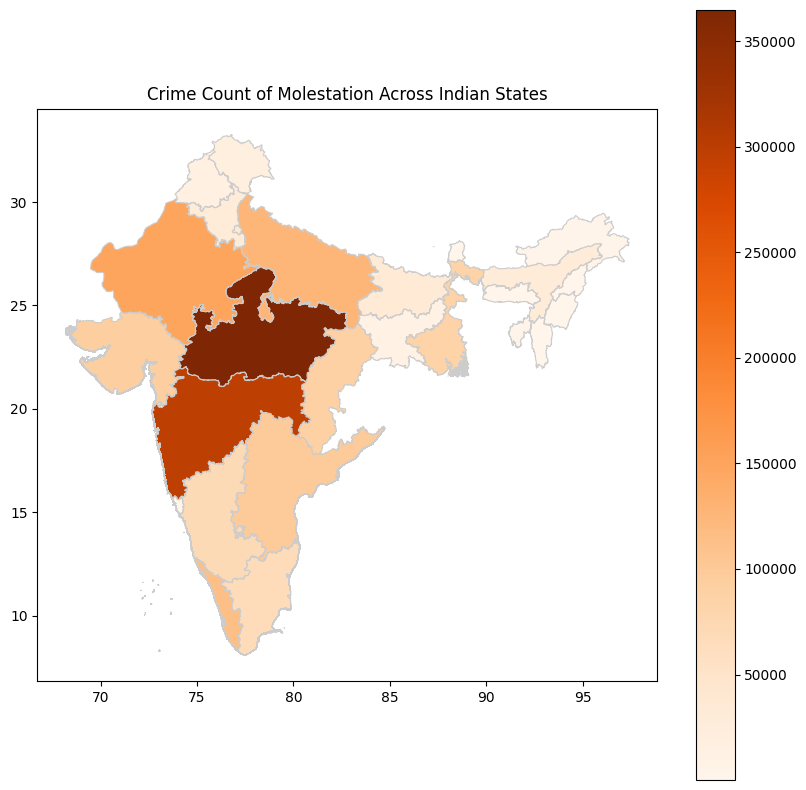

<ipython-input-16-a2d64c26385e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = crime_type_data.groupby('Area_Name').sum().reset_index()


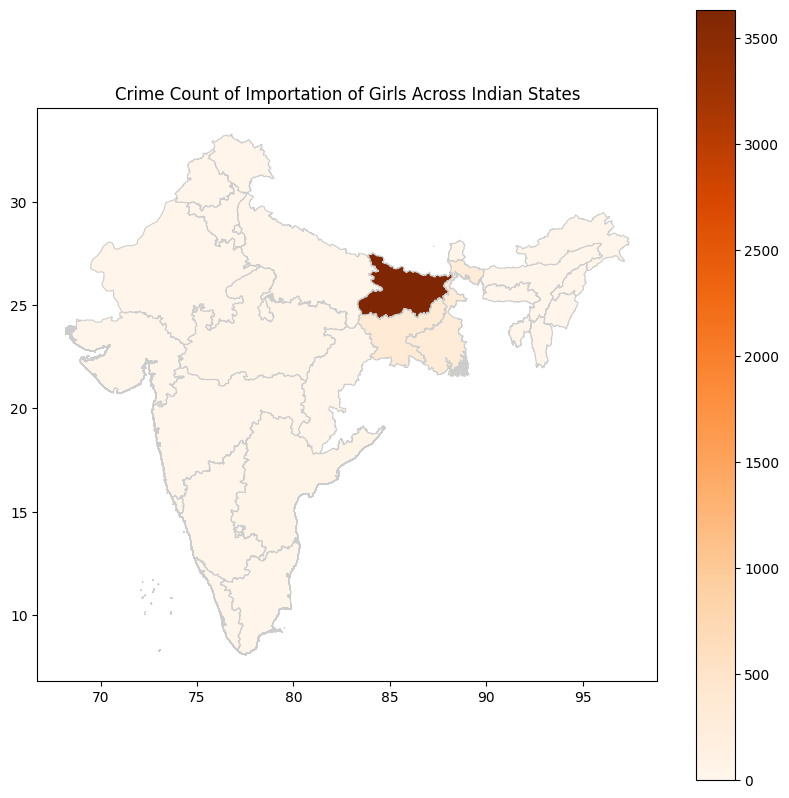

<ipython-input-16-a2d64c26385e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = crime_type_data.groupby('Area_Name').sum().reset_index()


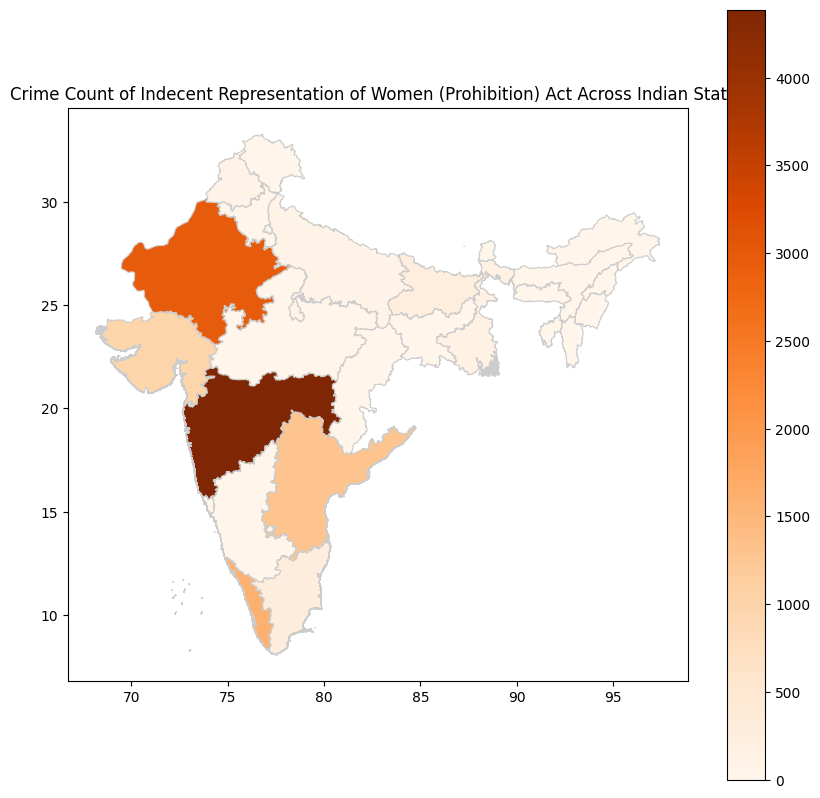

<ipython-input-16-a2d64c26385e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = crime_type_data.groupby('Area_Name').sum().reset_index()


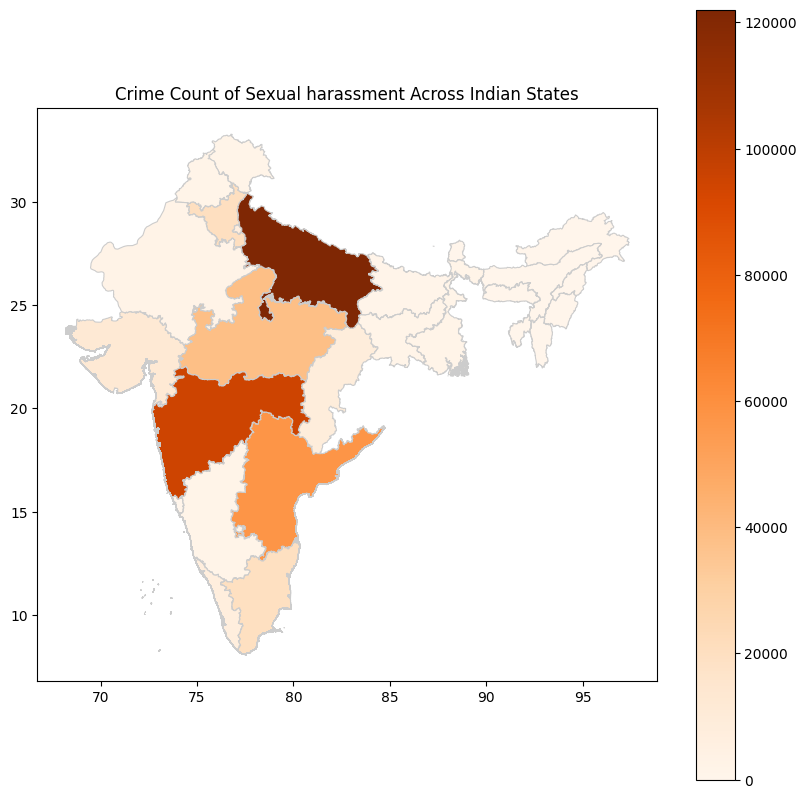

<ipython-input-16-a2d64c26385e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = crime_type_data.groupby('Area_Name').sum().reset_index()


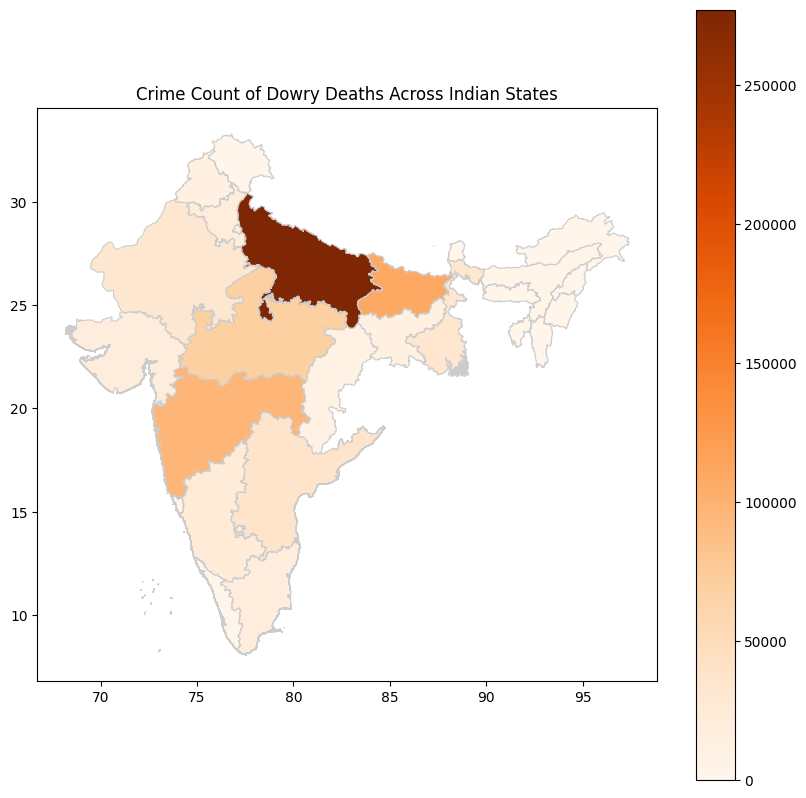

<ipython-input-16-a2d64c26385e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = crime_type_data.groupby('Area_Name').sum().reset_index()


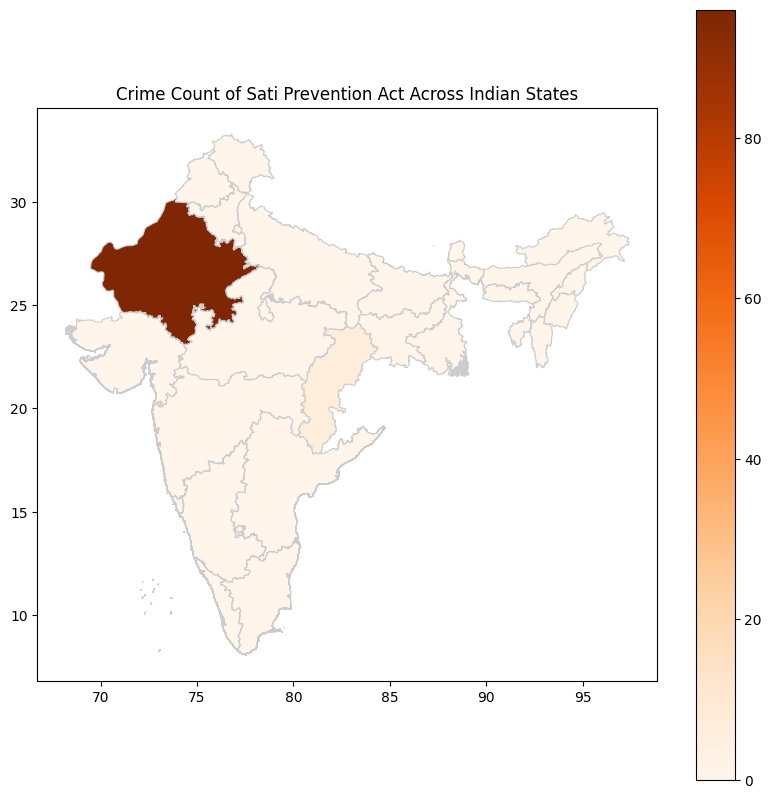

<ipython-input-16-a2d64c26385e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = crime_type_data.groupby('Area_Name').sum().reset_index()


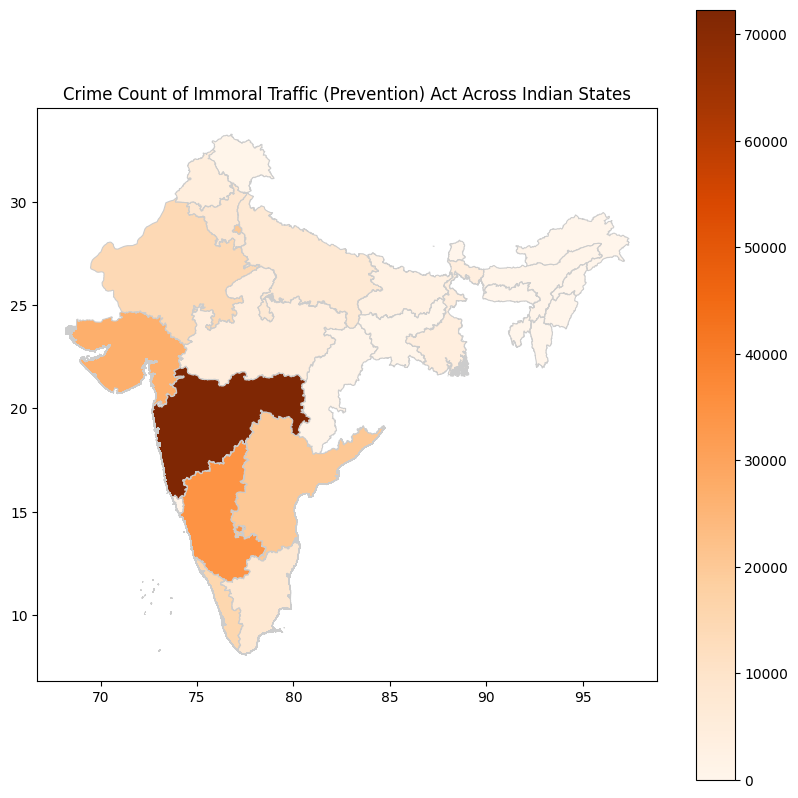

<ipython-input-16-a2d64c26385e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = crime_type_data.groupby('Area_Name').sum().reset_index()


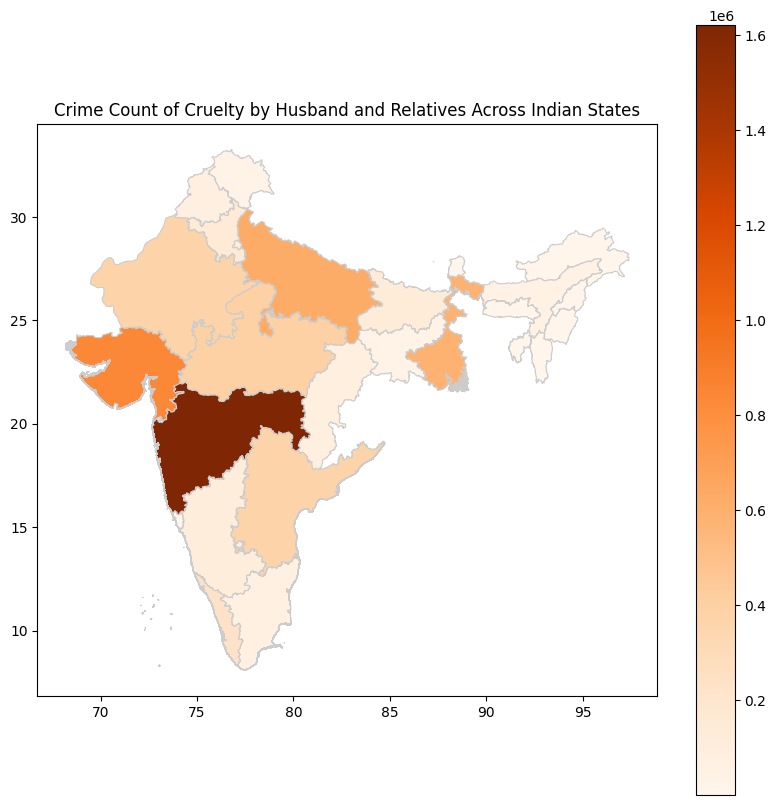

<ipython-input-16-a2d64c26385e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = crime_type_data.groupby('Area_Name').sum().reset_index()


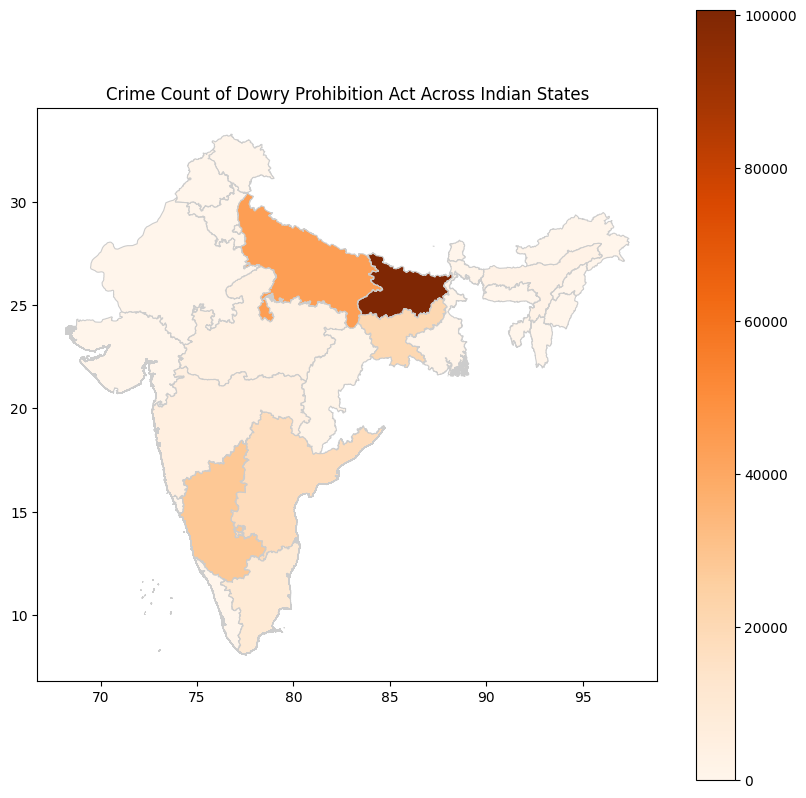

<ipython-input-16-a2d64c26385e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = crime_type_data.groupby('Area_Name').sum().reset_index()


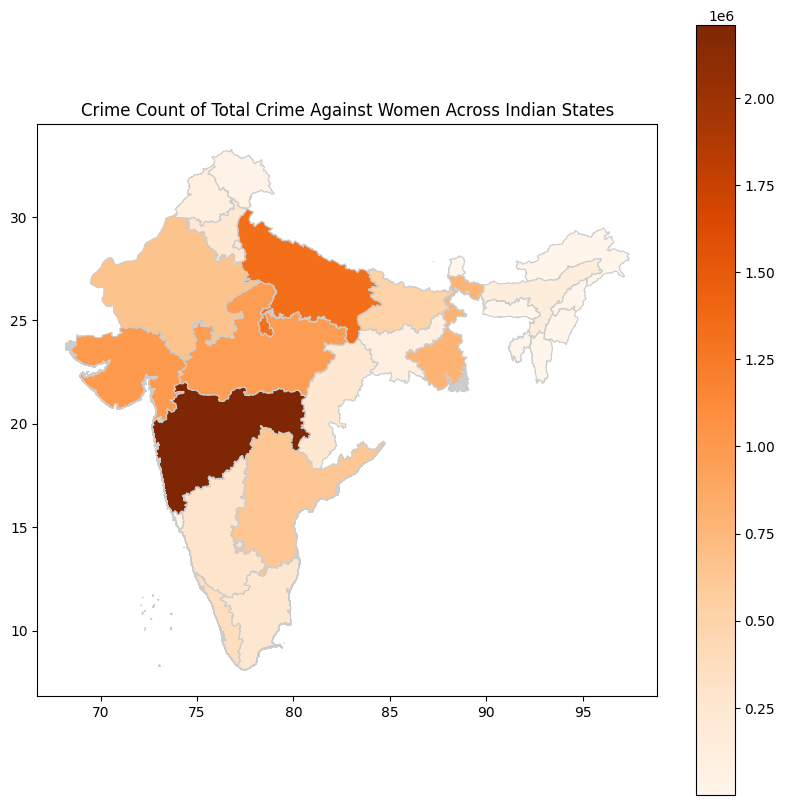

In [16]:
unique_crime_types = crime_data['Group_Name'].unique()

import matplotlib.pyplot as plt

for crime_type in unique_crime_types:
    crime_type_data = crime_data[crime_data['Group_Name'] == crime_type]

    aggregated_data = crime_type_data.groupby('Area_Name').sum().reset_index()
    aggregated_data = aggregated_data[['Area_Name', 'Total_Under_Trial']]
    aggregated_data = aggregated_data.rename(columns={'Area_Name': 'State', 'Total_Under_Trial': 'CrimeCount'})

    merged_data = indian_states.merge(aggregated_data, how='left', left_on='NAME_1', right_on='State')

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.set_title(f'Crime Count of {crime_type} Across Indian States')
    merged_data.plot(column='CrimeCount', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    plt.show()


In [24]:
import plotly.express as px

# Aggregate the counts of each crime type across all years
crime_counts_total = crime_data['Group_Name'].value_counts().reset_index()
crime_counts_total.columns = ['Crime Type', 'Acquitted']

# Create a pie chart using Plotly to represent the distribution of total crimes
fig = px.pie(crime_counts_total, values='Acquitted', names='Crime Type', title='Distribution of Total Crimes against Women (2001-2010)')
fig.show()


In [27]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Assuming you have columns for different case status like Under_Trial, Convicted, Acquitted, etc.
# Replace these columns with your actual column names

# Aggregating the sum of different case statuses
justice_police_status = crime_data[['Under_Trial_Beginning', 'Convicted', 'Acquitted', 'Arrested']].sum()

# Creating a pie chart showing the status of cases registered
fig = go.Figure(data=[go.Pie(labels=justice_police_status.index, values=justice_police_status.values)])
fig.update_layout(title='Status of Cases Registered')
pyo.iplot(fig)


In [33]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Assuming 'Total_Under_Trial' and 'features' have been defined and data has been preprocessed

# Fit the linear regression model on the entire dataset
model = LinearRegression()
model.fit(X, y)

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Create a scatter plot for actual vs predicted values
fig = go.Figure()
fig.add_trace(go.Scatter(x=y, y=y_pred, mode='markers', name='Actual vs Predicted'))
fig.add_trace(go.Scatter(x=[y.min(), y.max()], y=[y.min(), y.max()], mode='lines', name='Perfect Prediction', line=dict(color='red', dash='dash')))
fig.update_layout(title='Actual vs Predicted Values in Linear Regression', xaxis_title='Actual Values', yaxis_title='Predicted Values')
pyo.iplot(fig)
